# stuff

Setup

## Imports

In [1]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import NMF

## Loading

In [2]:
# Load the audio file
filename = '../mp3/chameleon.wav'  # Replace with your file path
y, sr = librosa.load(filename, sr=None)  # Load audio, preserving the original sample rate


Generate a spectrogram with a Hanning window

# stuff b2

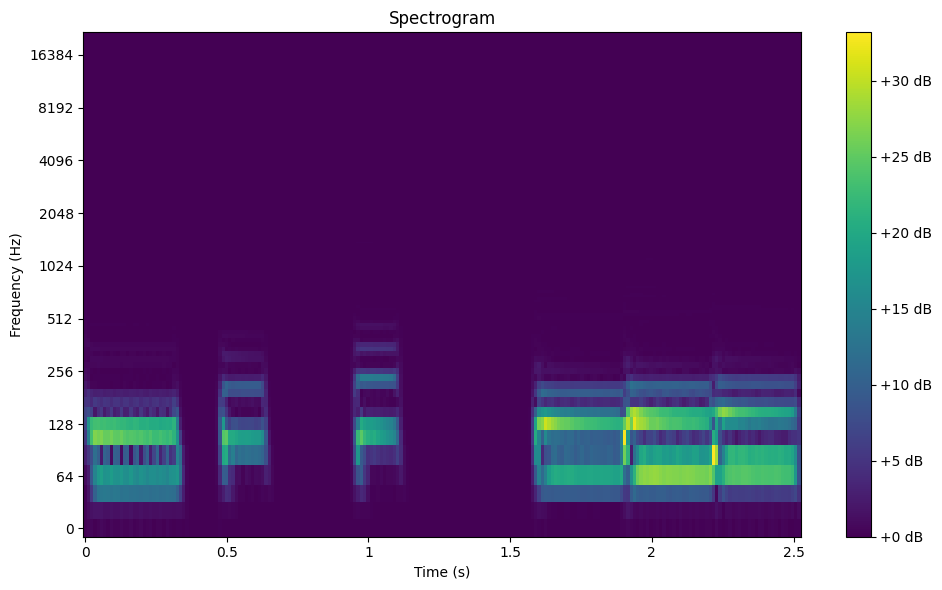

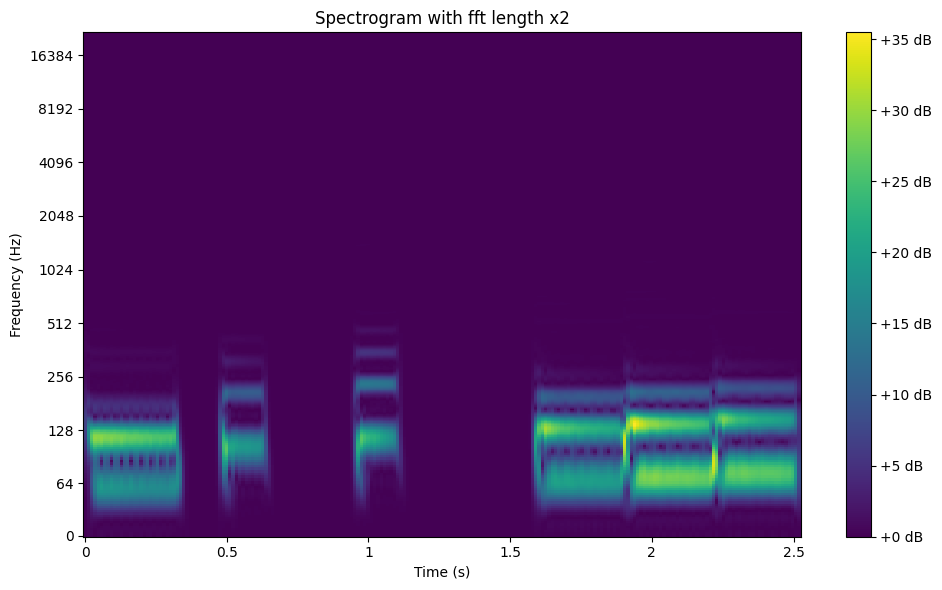

In [3]:
n_fft_1 = 2048
win_length_1 = n_fft_1
n_fft_2 = 16384
win_length_2 = n_fft_1
X_1 = np.abs(librosa.stft(y, window='hann', n_fft=n_fft_1, win_length=win_length_1))
X_2 = np.abs(librosa.stft(y, window='hann', n_fft=n_fft_2, win_length=win_length_2))

# Plot the spectrogram
plt.figure(figsize=(10, 6))
librosa.display.specshow(X_1, sr=sr, x_axis='time', y_axis='log', cmap='viridis')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.tight_layout()
plt.show()

# Plot the spectrogram
plt.figure(figsize=(10, 6))
librosa.display.specshow(X_2, sr=sr, x_axis='time', y_axis='log', cmap='viridis')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram with fft length x2')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.tight_layout()
plt.show()


Generate the W and H matrices

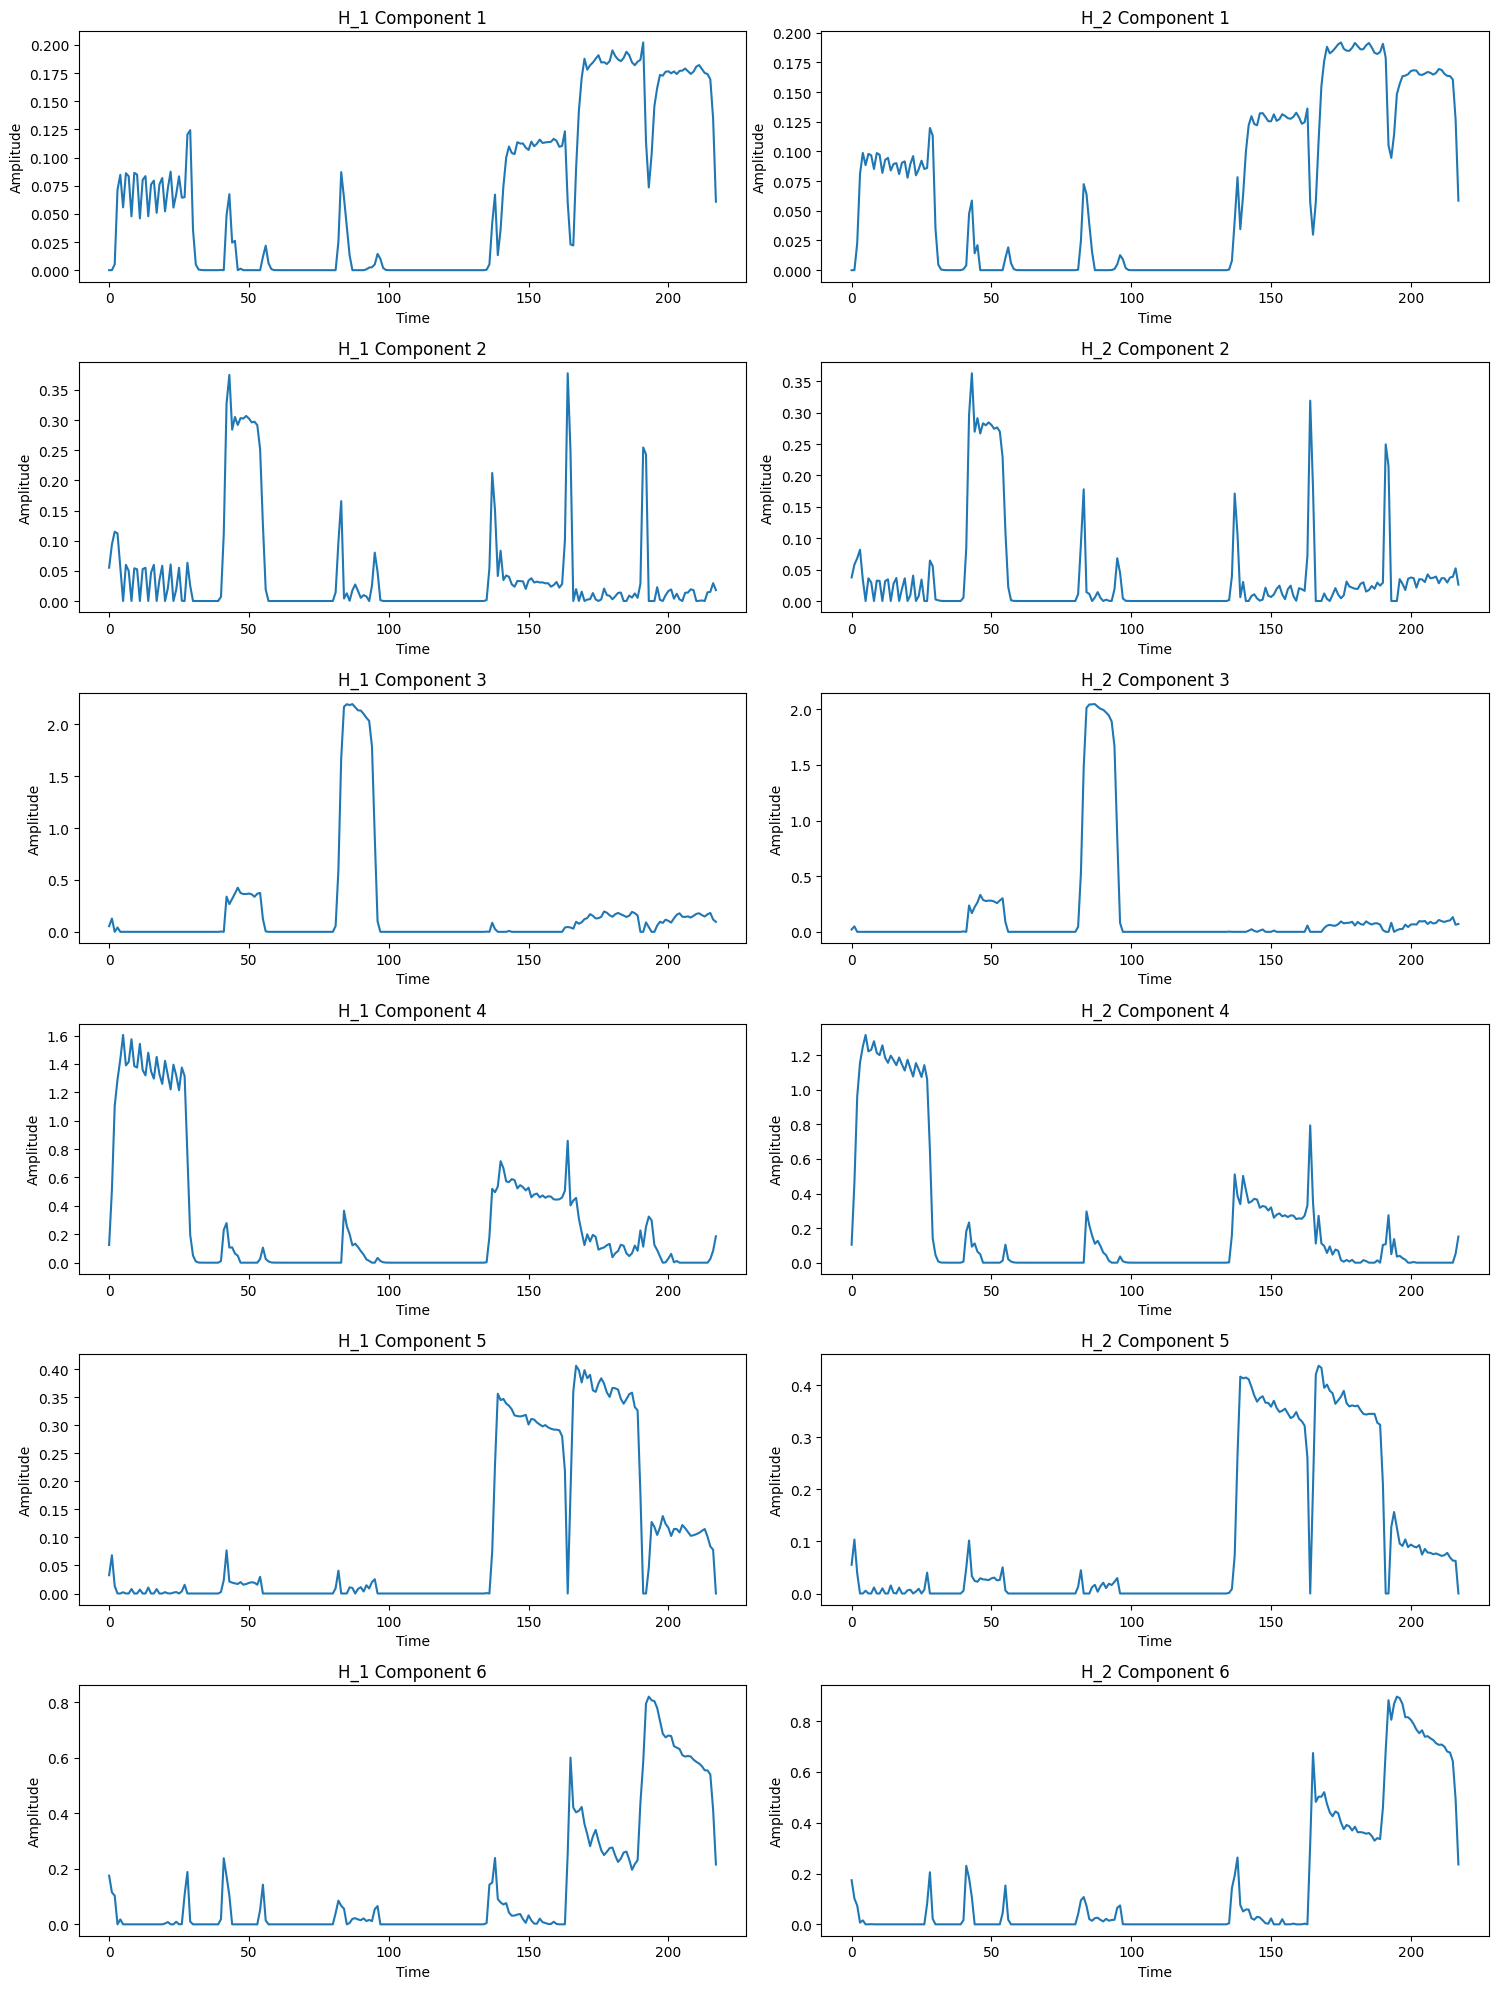

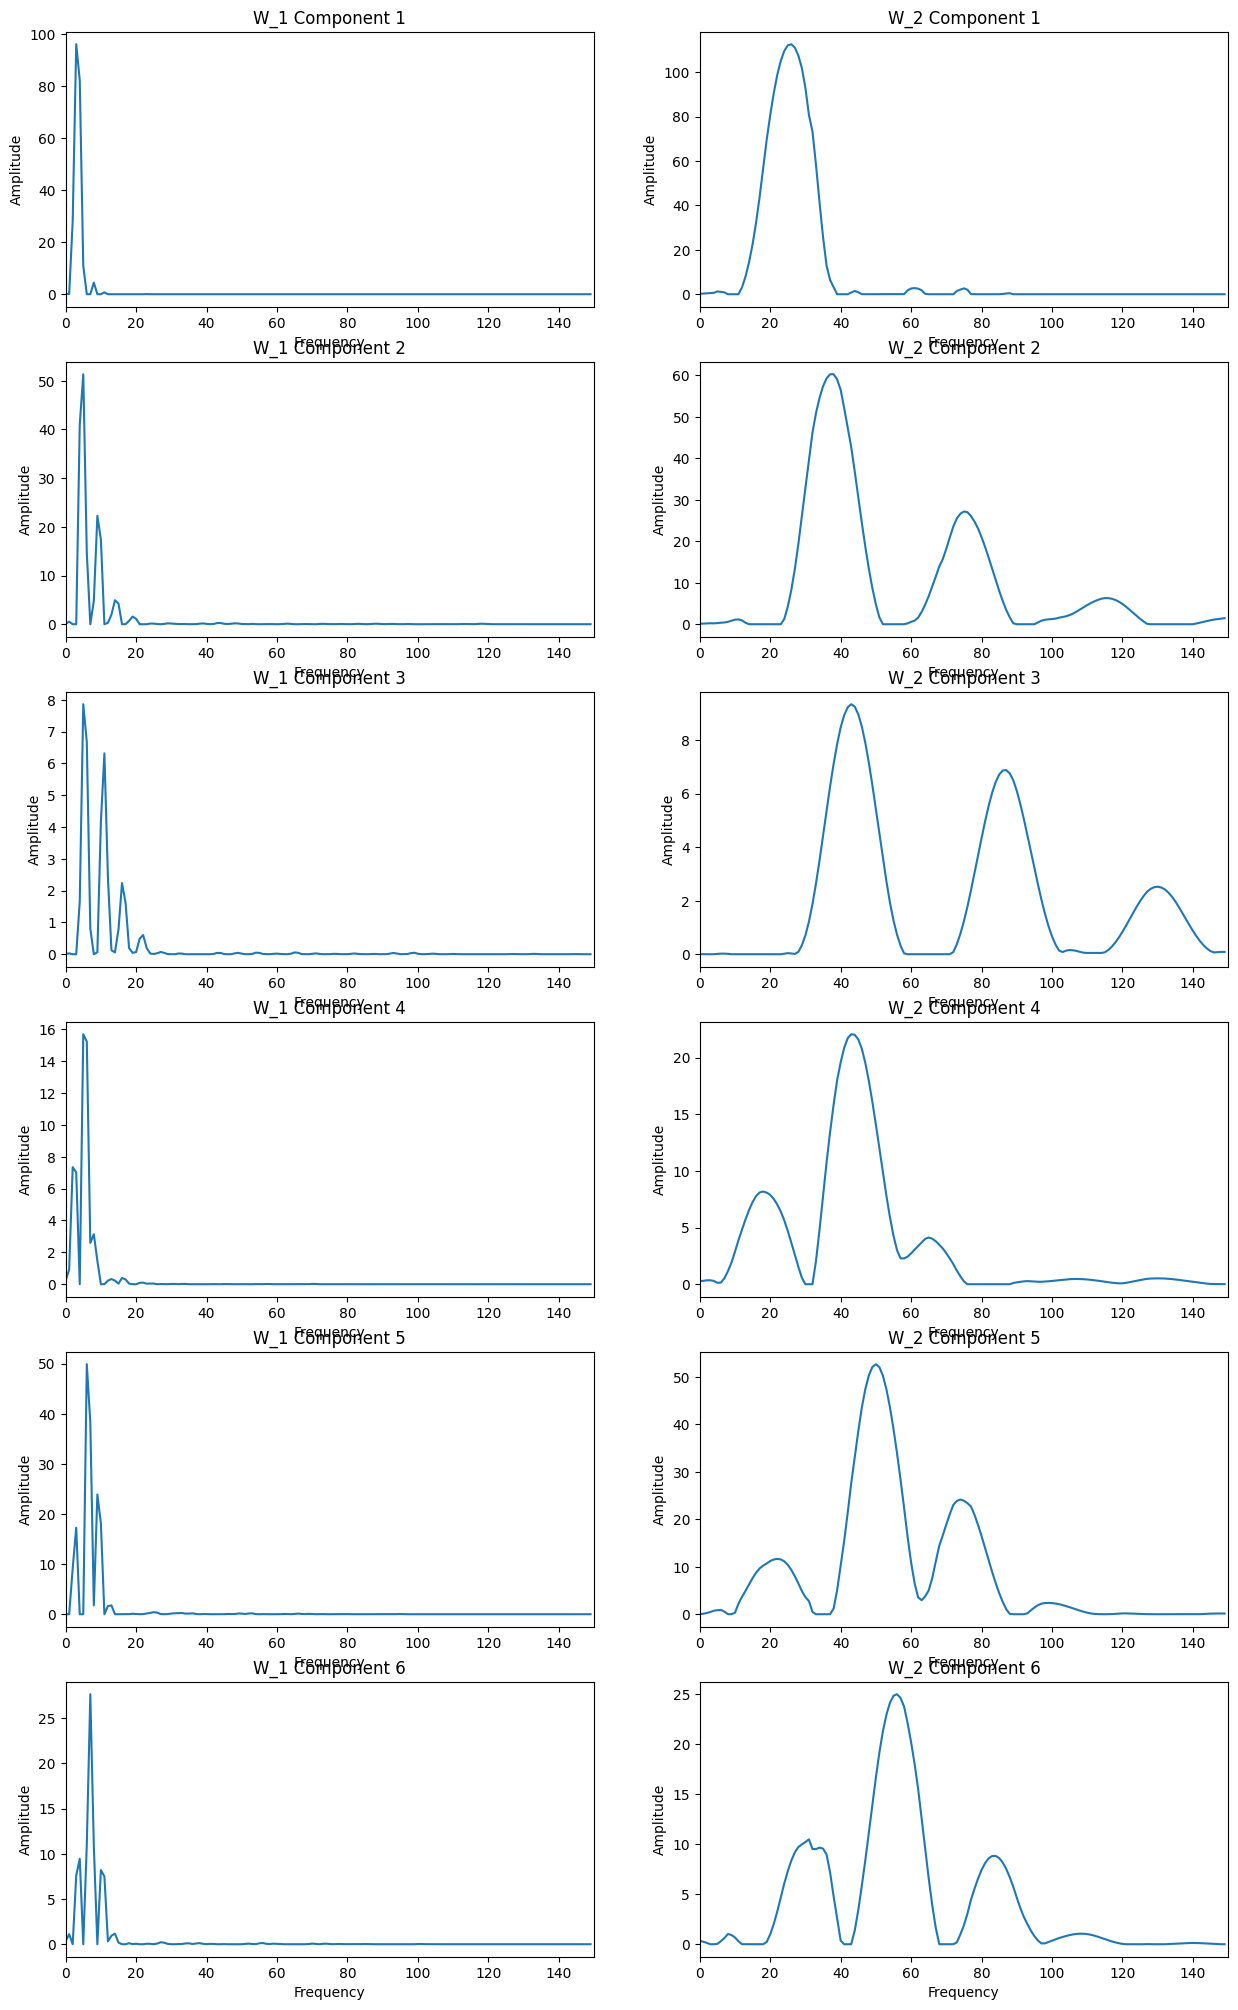

In [4]:
n_components = 6

model_1 = NMF(n_components=n_components, init='random', random_state=0, max_iter=1000)
model_2 = NMF(n_components=n_components, init='random', random_state=0, max_iter=1000)

# Fit the model to the data
W_1 = model_1.fit_transform(X=X_1)
W_2 = model_2.fit_transform(X=X_2)

# Get the H matrix
H_1 = model_1.components_
H_2 = model_2.components_

# Plot the H matrices
fig, axs = plt.subplots(n_components, 2, figsize=(15, 20))
for i in range(n_components):
    axs[i, 0].plot(H_1[i])
    axs[i, 0].set_title(f'H_1 Component {i+1}')
    axs[i, 0].set_xlabel('Time')
    axs[i, 0].set_ylabel('Amplitude')
    
    axs[i, 1].plot(H_2[i])
    axs[i, 1].set_title(f'H_2 Component {i+1}')
    axs[i, 1].set_xlabel('Time')
    axs[i, 1].set_ylabel('Amplitude')

plt.tight_layout()
plt.show()

# Plot the W matrices with zoomed-in frequencies
fig, axs = plt.subplots(n_components, 2, figsize=(15, 25))
freq_limit = 150
for i in range(n_components):
    axs[i, 0].plot(W_1[:freq_limit, i])
    axs[i, 0].set_title(f'W_1 Component {i+1}')
    axs[i, 0].set_xlabel('Frequency')
    axs[i, 0].set_ylabel('Amplitude')
    axs[i, 0].set_xlim(0, freq_limit)
    
    axs[i, 1].plot(W_2[:freq_limit, i])
    axs[i, 1].set_title(f'W_2 Component {i+1}')
    axs[i, 1].set_xlabel('Frequency')
    axs[i, 1].set_ylabel('Amplitude')
    axs[i, 1].set_xlim(0, freq_limit)


In [5]:
print(X_1.shape)
print(X_2.shape)

print(W_1.shape)
print(H_1.shape)
print(W_2.shape)
print(H_2.shape)


(1025, 218)
(8193, 218)
(1025, 6)
(6, 218)
(8193, 6)
(6, 218)


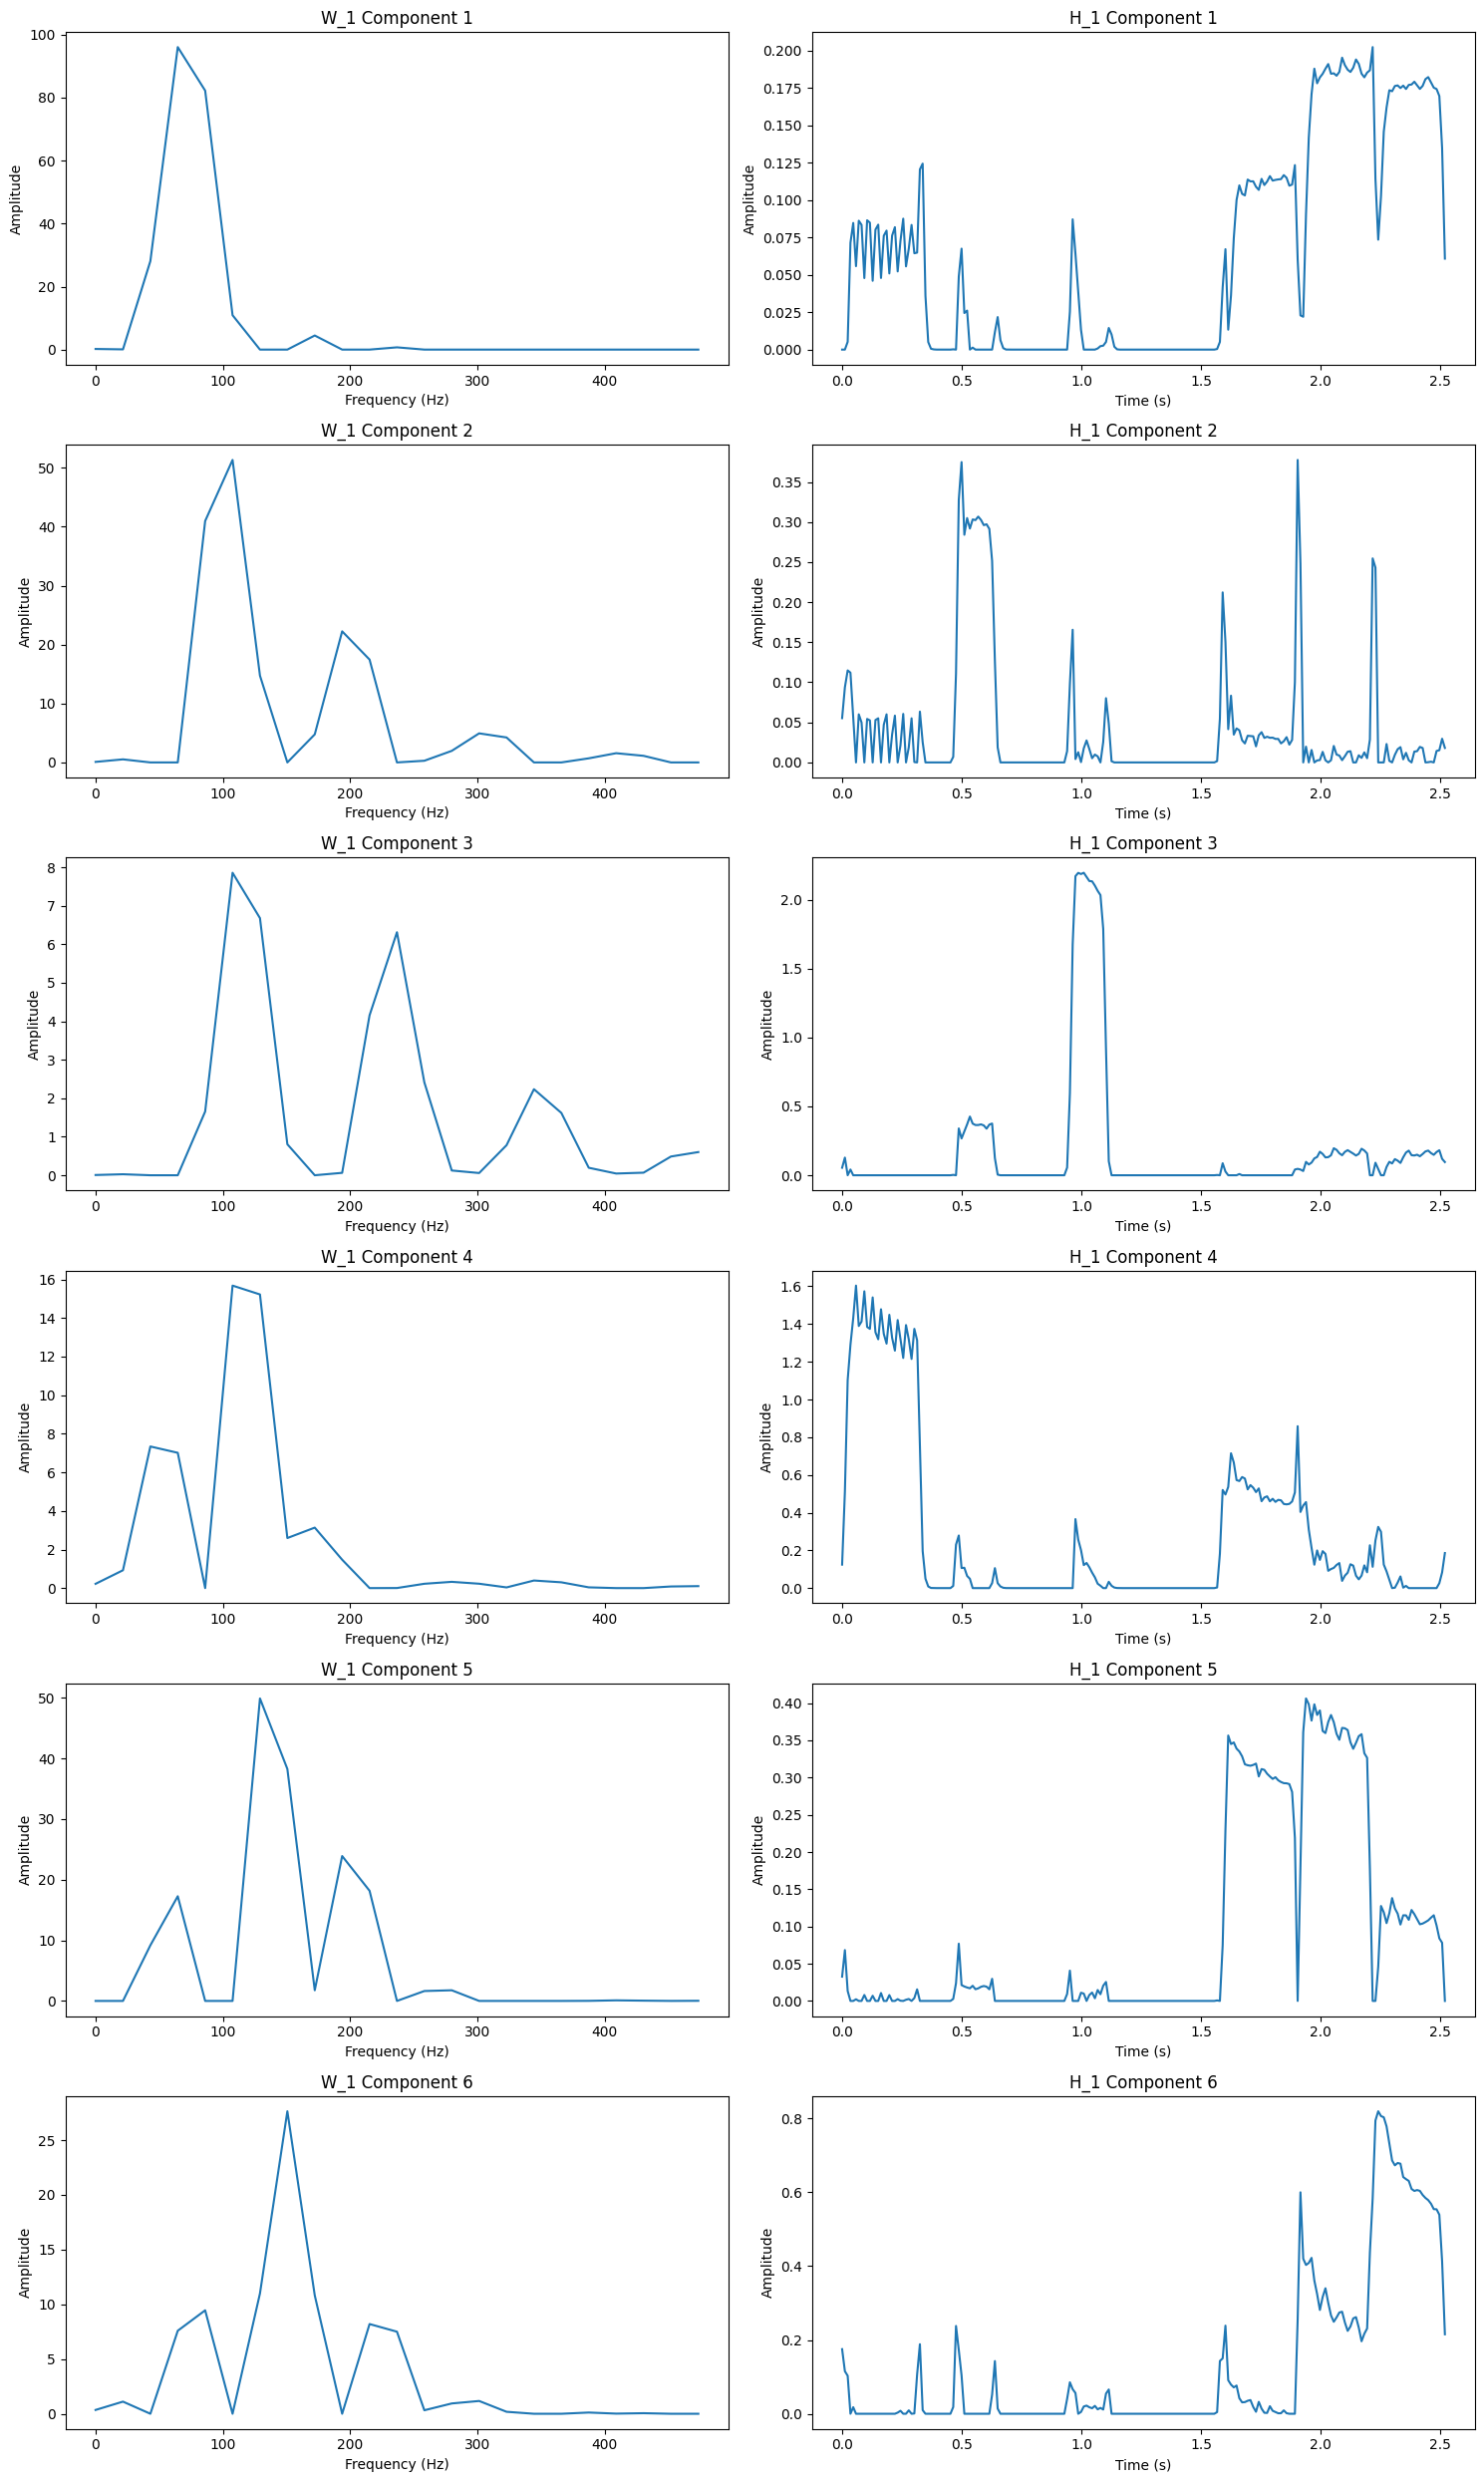

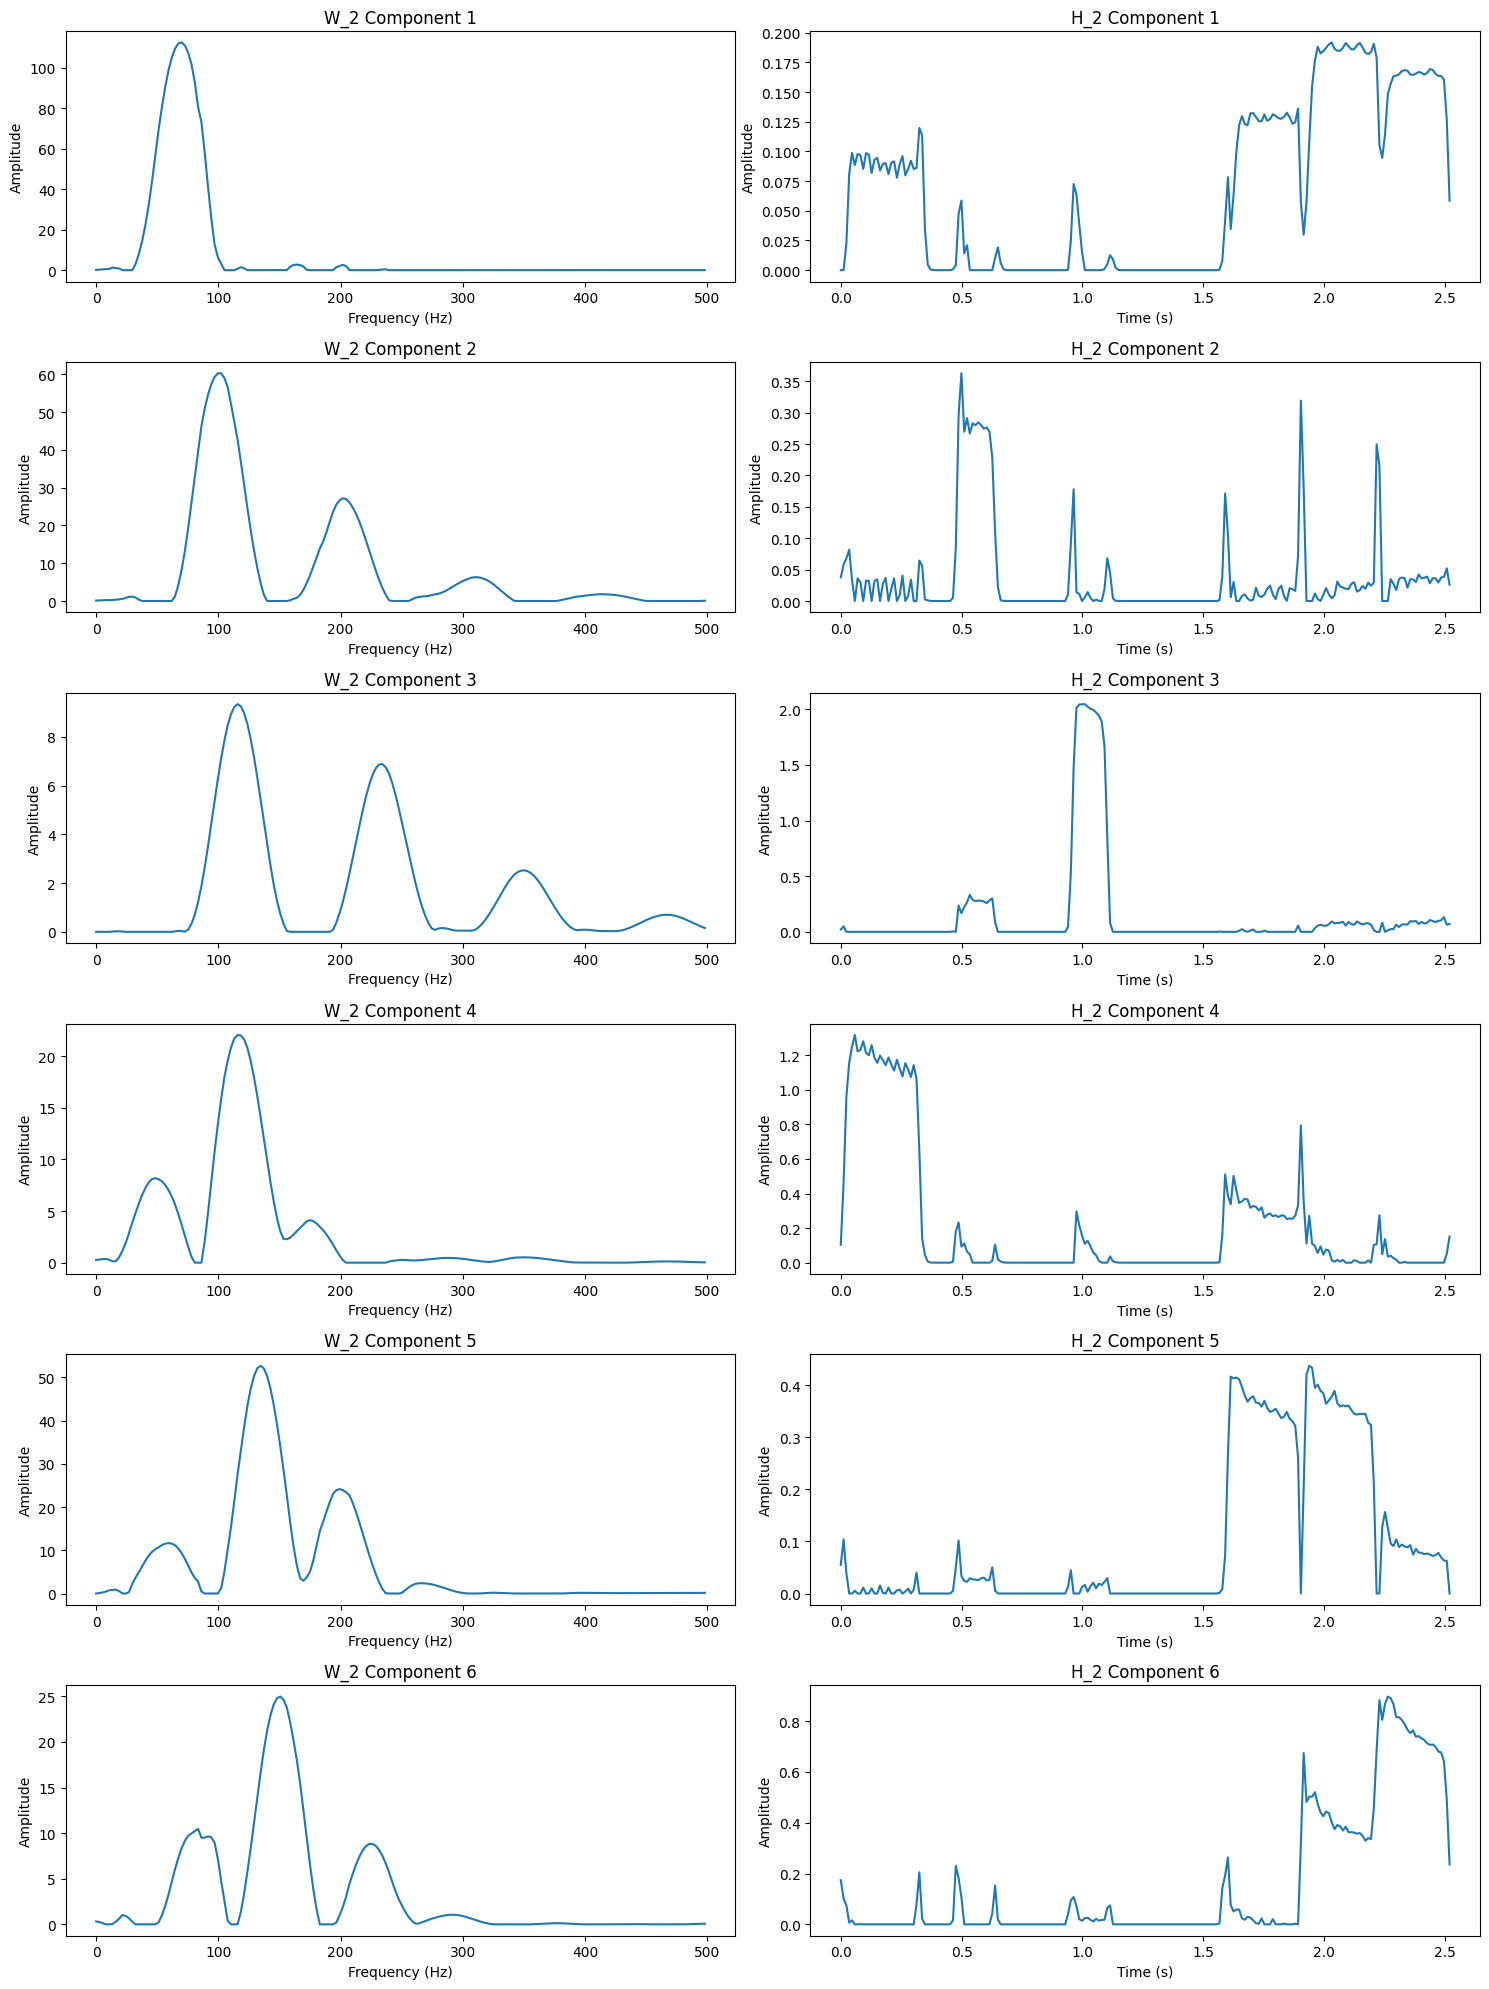

In [6]:
# Calculate the frequency axis for W matrices
freqs_1 = np.linspace(0, sr / 2, n_fft_1 // 2 + 1)
freqs_2 = np.linspace(0, sr / 2, n_fft_2 // 2 + 1)

# Calculate the time axis for H matrices
hop_length_1 = win_length_1 // 4  # Assuming a hop length of 1/4th of the window length
hop_length_2 = win_length_2 // 4  # Assuming a hop length of 1/4th of the window length
times_1 = np.arange(H_1.shape[1]) * hop_length_1 / sr
times_2 = np.arange(H_2.shape[1]) * hop_length_2 / sr

freq_limit = 500
freq_1_max_plot = np.argmin(np.abs(freqs_1 - freq_limit))
freq_2_max_plot = np.argmin(np.abs(freqs_2 - freq_limit))

# Plot the W matrices with frequency axis
fig, axs = plt.subplots(n_components, 2, figsize=(15, 25))
for i in range(n_components):
    axs[i, 0].plot(freqs_1[:freq_1_max_plot], W_1[:freq_1_max_plot, i])
    axs[i, 0].set_title(f'W_1 Component {i+1}')
    axs[i, 0].set_xlabel('Frequency (Hz)')
    axs[i, 0].set_ylabel('Amplitude')

    axs[i, 1].plot(times_1, H_1[i])
    axs[i, 1].set_title(f'H_1 Component {i+1}')
    axs[i, 1].set_xlabel('Time (s)')
    axs[i, 1].set_ylabel('Amplitude')

plt.tight_layout()
plt.show()

# Plot the H matrices with time axis
fig, axs = plt.subplots(n_components, 2, figsize=(15, 20))
for i in range(n_components):
    axs[i, 0].plot(freqs_2[:freq_2_max_plot], W_2[:freq_2_max_plot, i])
    axs[i, 0].set_title(f'W_2 Component {i+1}')
    axs[i, 0].set_xlabel('Frequency (Hz)')
    axs[i, 0].set_ylabel('Amplitude')
    
    axs[i, 1].plot(times_2, H_2[i])
    axs[i, 1].set_title(f'H_2 Component {i+1}')
    axs[i, 1].set_xlabel('Time (s)')
    axs[i, 1].set_ylabel('Amplitude')

plt.tight_layout()
plt.show()

#  Reconstruct individual components

In [7]:
print(H_2.shape, W_2.shape)


(6, 218) (8193, 6)


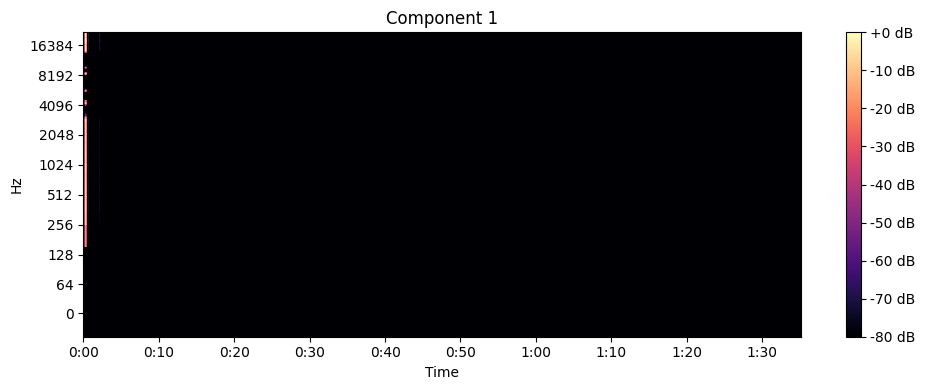

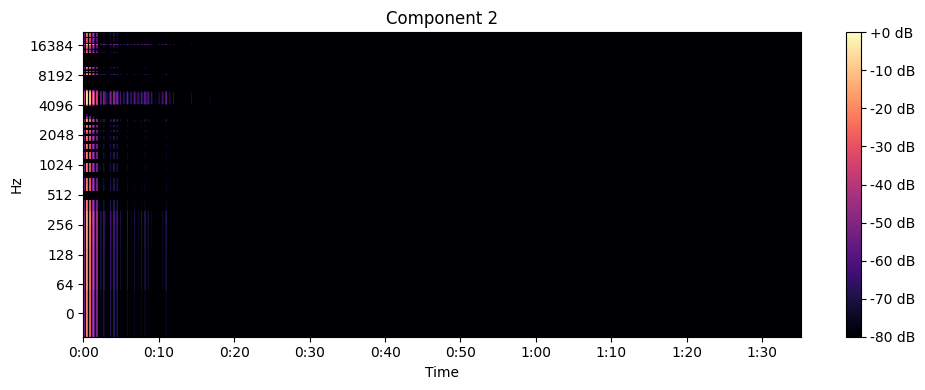

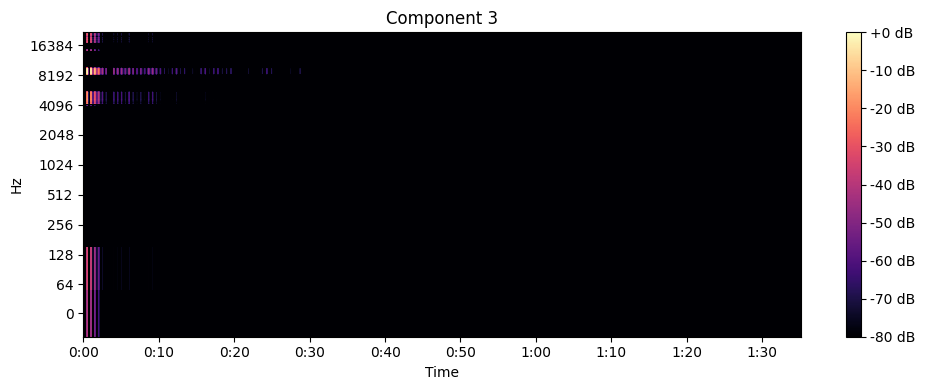

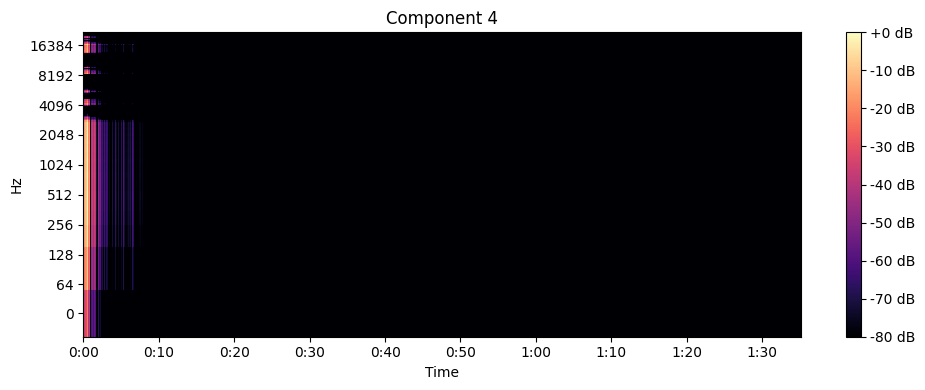

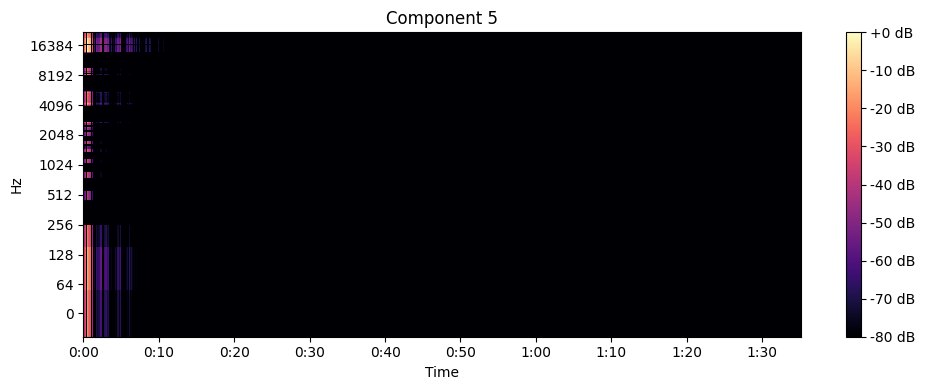

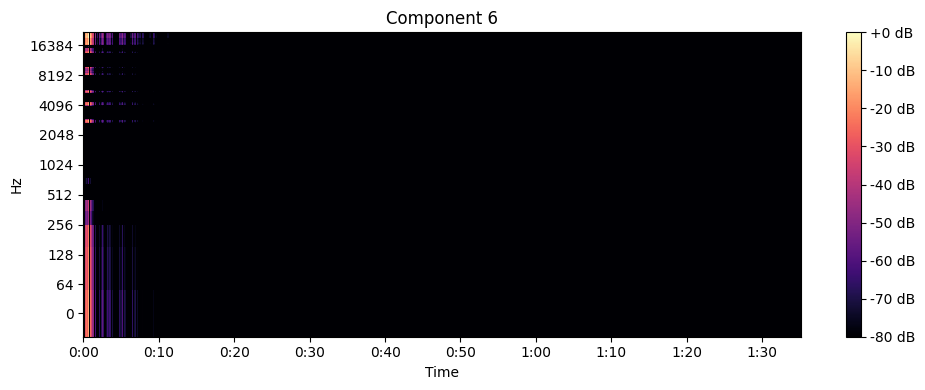

In [8]:
# Reconstruct individual components
components = []
for i in range(H_2.shape[0]):
    reconstructed = np.outer(W_2[:, i], H_2[i, :]).T
    components.append(reconstructed)

# Plot individual components
for i, comp in enumerate(components):
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(librosa.amplitude_to_db(comp, ref=np.max),
                             sr=sr, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title(f'Component {i+1}')
    plt.tight_layout()
    plt.show()


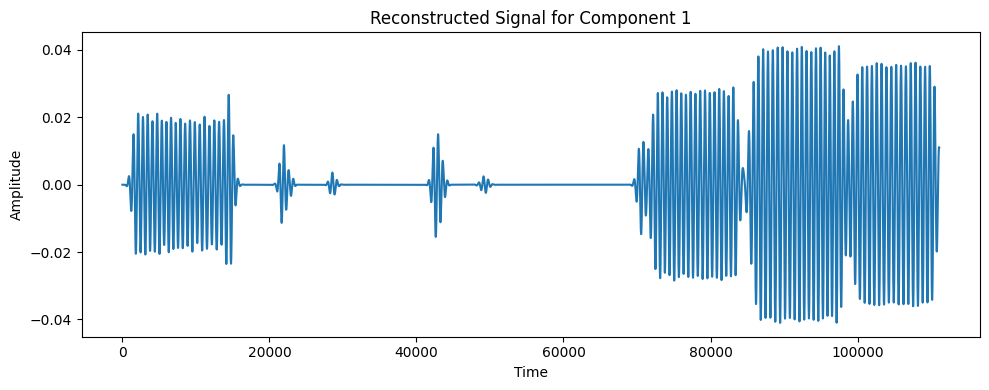

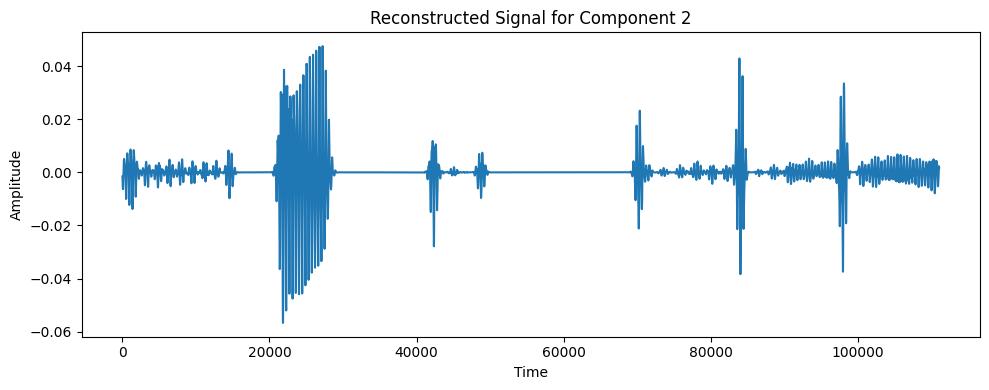

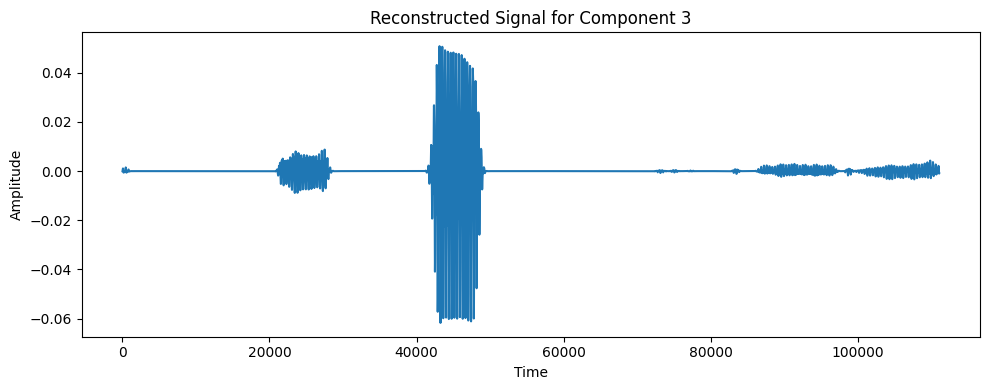

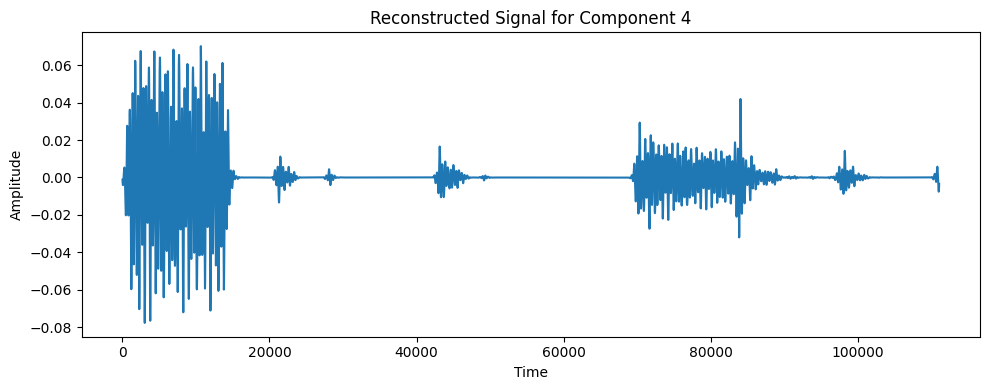

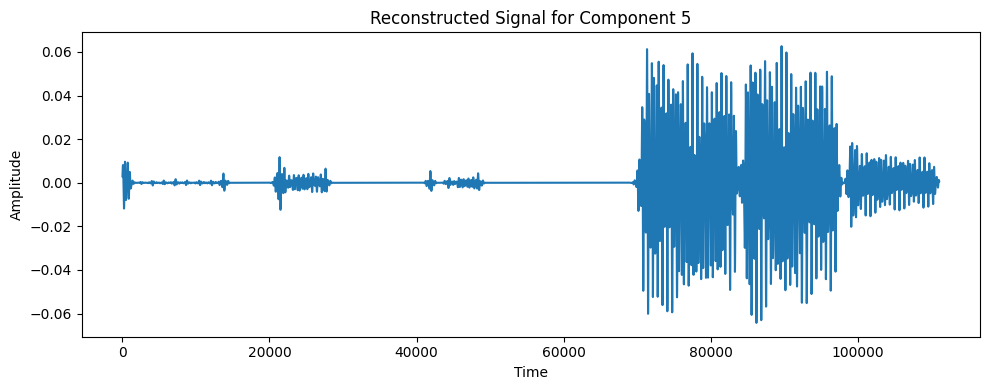

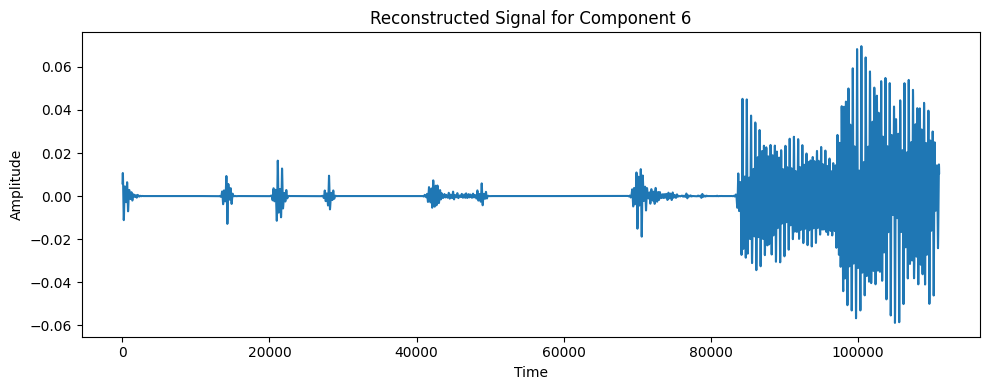

In [16]:
import soundfile as sf

reconstructed_signals = []
for i, comp in enumerate(components):
    # Reconstruct the magnitude spectrogram using Griffin-Lim
    reconstructed_signal = librosa.griffinlim(comp.T, n_iter=32, hop_length=hop_length_2, win_length=win_length_2)
    reconstructed_signals.append(reconstructed_signal)

    # Plot the waveform of the reconstructed signal
    plt.figure(figsize=(10, 4))
    plt.plot(reconstructed_signal)
    plt.title(f'Reconstructed Signal for Component {i+1}')
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.tight_layout()
    plt.show()
    # Save the reconstructed signals to wav files
    for i, reconstructed_signal in enumerate(reconstructed_signals):
        sf.write(f'reconstructed_signal_component_{i+1}.wav', reconstructed_signal, sr)

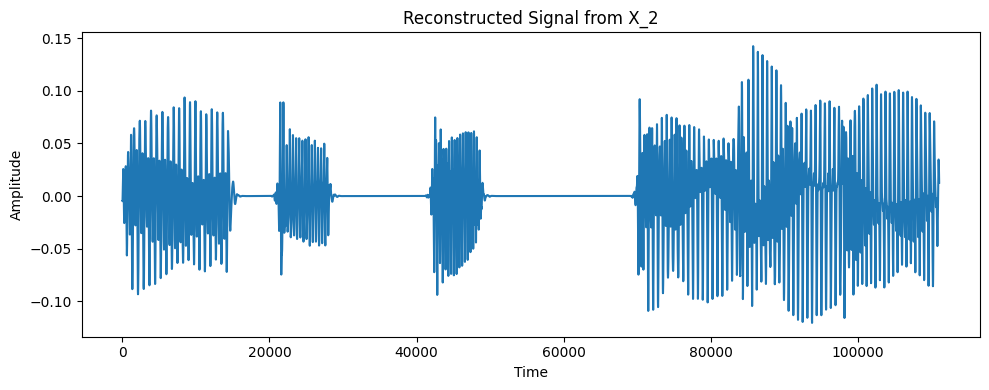

In [17]:
# Reconstruct the magnitude spectrogram
X_2_reconstructed = np.dot(W_2, H_2)

# Use Griffin-Lim algorithm to reconstruct the time-domain signal
reconstructed_signal = librosa.griffinlim(X_2_reconstructed, n_iter=32, hop_length=hop_length_2, win_length=win_length_2)

# Save the reconstructed signal to a .wav file
sf.write('reconstructed_X_2.wav', reconstructed_signal, sr)

# Plot the waveform of the reconstructed signal
plt.figure(figsize=(10, 4))
plt.plot(reconstructed_signal)
plt.title('Reconstructed Signal from X_2')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()